In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', 26) #ver todas las columnas
pd.set_option('display.max_rows', 50) #como mucho ver 50 filas

In [3]:
''' + Sólo 8 atributos son comunes a todos los valores
    + Se podrían renombrar varias columnas
    + Podria cambiarse el orden de algunas columnas
'''

df.info() #42 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null object
direccion                     186928 non-null object
ciudad                        239628 non-null object
provincia                     239845 non-null object
antiguedad                    196445 non-null float64
habitaciones                  217529 non-null float64
garages                       202235 non-null float64
banos                         213779 non-null float64
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                         240

In [4]:
''' + id, antiguedad, habitaciones, garages, banos, metroscubiertos, metrostotales, idzonas y precio pueden ser int
    + gimnasio, usosmultiples, piscina, escuelascercanas, centroscomercialescercanos pueden ser bool
    + fecha se puede pasar a datetime
    + tipodepropiedad, ciudad y provincia podrían ser categorías
'''

df.describe()

,id,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
count,240000.000000,196445.000000,217529.000000,202235.000000,213779.000000,222600.000000,188533.000000,2.113790e+05,116512.000000,116512.000000,240000.000000,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05
mean,149969.382092,8.116114,2.902326,1.546874,2.132417,174.016774,176.765145,2.423468e+06,20.696818,-99.509221,0.062475,0.055092,0.087383,0.444142,0.396533,2.530838e+06
std,86634.579744,9.553830,0.896894,0.853507,0.912546,98.152950,94.427328,1.056794e+07,3.137884,9.744143,0.242017,0.228160,0.282397,0.496871,0.489179,2.152552e+06
min,1.000000,0.000000,1.000000,0.000000,1.000000,15.000000,15.000000,2.200000e+01,-100.886679,-125.859375,0.000000,0.000000,0.000000,0.000000,0.000000,3.100000e+05
25%,74930.750000,0.000000,2.000000,1.000000,1.000000,90.000000,102.000000,2.489000e+04,19.359846,-100.977908,0.000000,0.000000,0.000000,0.000000,0.000000,9.527725e+05
50%,149875.500000,5.000000,3.000000,2.000000,2.000000,153.000000,155.000000,5.638300e+04,19.543273,-99.240387,0.000000,0.000000,0.000000,0.000000,0.000000,1.850000e+06
75%,225016.500000,10.000000,3.000000,2.000000,3.000000,240.000000,238.000000,8.783800e+04,20.740005,-99.134777,0.000000,0.000000,0.000000,1.000000,1.000000,3.390000e+06
max,299999.000000,80.000000,10.000000,3.000000,4.000000,439.000000,439.000000,5.000400e+07,83.026219,121.036000,1.000000,1.000000,1.000000,1.000000,1.000000,1.252500e+07


In [5]:
''' Hay todo tipo de datos incorrectos
'''

df[['direccion', 'descripcion', 'titulo']]

,direccion,descripcion,titulo
0,Avenida Division del Norte 2005,"depto. interior de 80.15m2, consta de sala com...",depto. tipo a-402
1,AV. MEXICO,"<p>entre sonora y guerrero, atr&aacute;s del h...",condominio horizontal en venta
2,Urbi Tonala,descripcion \nla mejor ubicacion residencial e...,casa en venta urbi 3 recamaras tonala
3,IGNACIO MANUEL ALTAMIRANO 128,casa en privada con caseta de vigilancia casas...,casa sola en toluca zinacantepec con credito i...
4,PASEOS DEL SOL,bonito departamento en excelentes condiciones ...,paseos del sol
5,Condominio Tlalpan 2B,"amplio departamento, estancia de sala y comedo...",departamento en venta taxqueña
6,NaN,"ubicada en esquina, pertenece san lorenzo agen...",de oportunidad casa en san lorenzo
7,condominio el trebol,casa emilia en venta playa del carmenfracciona...,casa emilia en venta en selvamar playa del carmen
8,BUENAVISTA DEPTOS CON SUBSIDIO,<p>pre-venta de preciosos departamento ecologi...,pre- venta preciosos depas 2 recamaras con sub...
9,Av. Morelos,"terreno de 5.500m2 bardeado, uso de suelo h-20...",terreno


In [6]:
''' Todos los precios son enteros.'''
pd.reset_option('float_format') #Sólo por si posteriormente se cambia el formato de los float
df.sample(5)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,metroscubiertos,metrostotales,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
114572,197985,"casa en venta, en coto, al norte de aguascalie...","<p> vende casa en coto, al norte, dos pisos.\n...",Casa en condominio,NaN,Jesús María,Aguascalientes,5.0,3.0,NaN,2.0,223.0,210.0,943.0,21.944912,-102.307021,2016-12-02 00:00:00,0.0,0.0,1.0,1.0,1.0,1900000.0
62028,271001,bonita casa en cofradía i cuautitlán izcallí,"casa de 2 niveles, 2 recamaras, 1 con closet, ...",Casa,RETORNO LLANO COLORADO,Cuautitlán Izcalli,Edo. de México,10.0,2.0,1.0,1.0,62.0,62.0,56869.0,NaN,NaN,2014-10-02 00:00:00,0.0,0.0,0.0,1.0,1.0,585000.0
106433,277758,departamento en venta en san pedro de los pinos,departamentos en preventa de 145m2 a 206m2 con...,Apartamento,calle 27,Benito Juárez,Distrito Federal,NaN,3.0,2.0,3.0,205.0,NaN,23567.0,NaN,NaN,2016-05-08 00:00:00,0.0,0.0,0.0,0.0,0.0,4832000.0
192457,112442,casa en venta en nueva galicia,"casa en excelentes condiciones, ubicacion cent...",Casa,NUEVA GALICIA,Hermosillo,Sonora,20.0,3.0,3.0,2.0,180.0,200.0,94425.0,NaN,NaN,2016-10-14 00:00:00,0.0,1.0,0.0,1.0,1.0,1350000.0
220226,240455,"casa en venta en club de golf, méxico.",<p>excelente casa en condominio horizontal con...,Casa,VIADUNTO TLALPAN No. 1010,Tlalpan,Distrito Federal,30.0,3.0,NaN,3.0,NaN,220.0,24933.0,19.299382,-99.144823,2014-03-14 00:00:00,0.0,0.0,0.0,1.0,1.0,4490000.0


In [7]:
''' Renombrar las columnas
'''

nombresNuevos = {
                 'id' : 'ID',
                 'titulo' : 'Titulo',
                 'descripcion' : 'Descripcion',
                 'tipodepropiedad' : 'TipoPropiedad',
                 'direccion' : 'Direccion',
                 'ciudad' : 'Ciudad',
                 'provincia' : 'Provincia',
                 'antiguedad' : 'Antiguedad',
                 'habitaciones' : 'CantHabitaciones',
                 'garages' : 'CantGarages',
                 'banos' : 'CantBanos',
                 'metroscubiertos' : 'MetrosCuadradosCubiertos',
                 'metrostotales' : 'MetrosCuadradosTotales',
                 'idzona' : 'IDZona',
                 'lat' : 'Latitud',
                 'lng' : 'Longitud',
                 'fecha' : 'Fecha',
                 'gimnasio' : 'TieneGimnasio',
                 'usosmultiples' : 'TieneUsosMultiples',
                 'piscina' : 'TienePileta',
                 'escuelascercanas' : 'TieneEscuelasCerca',
                 'centroscomercialescercanos' : 'TieneShoppingsCerca',
                 'precio' : 'Precio'
                
}

dfok = df.rename(columns = nombresNuevos)

In [8]:
''' Reacomodamiento de columnas
'''

nombresEnOrden = [
                 'ID',
                 'Titulo',
                 'TipoPropiedad',
                 'Precio',
                 'Fecha',
                 'Antiguedad',
                 'MetrosCuadradosCubiertos',
                 'MetrosCuadradosTotales',
                 'Descripcion',
                 
                 'CantHabitaciones',
                 'CantGarages',
                 'CantBanos',
               
                 'IDZona',
                 'Direccion',
                 'Ciudad',
                 'Provincia',
                 'Latitud',
                 'Longitud',
                 
                 'TieneGimnasio',
                 'TieneUsosMultiples',
                 'TienePileta',
                 'TieneEscuelasCerca',
                 'TieneShoppingsCerca'
    ]                 

dfok = dfok[nombresEnOrden]
dfok.head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca
0,254099,depto. tipo a-402,Apartamento,2273000.0,2015-08-23 00:00:00,NaN,80.0,80.0,"depto. interior de 80.15m2, consta de sala com...",2.0,1.0,2.0,23533.0,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del h...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0
2,247984,casa en venta urbi 3 recamaras tonala,Casa,1200000.0,2015-10-17 00:00:00,5.0,144.0,166.0,descripcion \nla mejor ubicacion residencial e...,3.0,2.0,2.0,48551.0,Urbi Tonala,Tonalá,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0
3,209067,casa sola en toluca zinacantepec con credito i...,Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,casa en privada con caseta de vigilancia casas...,2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones ...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [9]:
(df.memory_usage(deep = True).sum()/1024)/1024 #Memoria Original

249.11328411102295

In [10]:
''' Verificación adicional de valores máximos para columnas numéricas cuyo tipo se quiere modificar
'''

[
dfok['ID'].max(),
    
dfok['Antiguedad'].max(), 
dfok['CantHabitaciones'].max(), 
dfok['CantGarages'].max(),
dfok['CantBanos'].max() ,

dfok['MetrosCuadradosCubiertos'].max(),
dfok['MetrosCuadradosTotales'].max(),    
dfok['IDZona'].max(),
dfok['Precio'].max(),] 

[299999, 80.0, 10.0, 3.0, 4.0, 439.0, 439.0, 50003999.0, 12525000.0]

In [11]:
"""''' Adecuación de tipos de columnas

    Considerar las cotas:
    uint8   -> 255
    uint16  -> 65 535
    uint32  -> 4 294 967 295
    uint64  -> 18 446 744 073 709 551 615
'''

# Numéricos
dfok['ID'] = dfok['ID'].astype(np.uint32)

dfok['Antiguedad'] = dfok['Antiguedad'].astype(np.uint8)
dfok['CantHabitaciones'] = dfok['CantHabitaciones'].astype(np.uint8)
dfok['CantGarages'] = dfok['CantGarages'].astype(np.uint8)
dfok['CantBanos'] = dfok['CantBanos'].astype(np.uint8)

dfok['MetrosCuadradosCubiertos'] = dfok['MetrosCuadradosCubiertos'].astype(np.uint16)
dfok['MetrosCuadradosTotales'] = dfok['MetrosCuadradosTotales'].astype(np.uint16)
dfok['IDZona'] = dfok['IDZona'].astype(np.uint32)
dfok['Precio'] = dfok['Precio'].astype(np.uint32)

# Booleanos
dfok['TieneGimnasio'] = dfok['TieneGimnasio'].astype(np.bool)
dfok['TieneUsosMúltiples'] = dfok['TieneUsosMúltiples'].astype(np.bool)
dfok['TienePileta'] = dfok['TienePileta'].astype(np.bool)
dfok['TieneEscuelasCerca'] = dfok['TieneEscuelasCerca'].astype(np.bool)
dfok['TieneShoppingsCerca'] = dfok['TieneShoppingsCerca'].astype(np.bool)

# Fecha
dfok['Fecha'] = dfok['Fecha'].astype('datetime64')

# Categóricas
dfok['TipoPropiedad'] = dfok['TipoPropiedad'].astype('category')
dfok['Ciudad'] = dfok['Ciudad'].astype('category')
dfok['Provincia'] = dfok['Provincia'].astype('category')

dfok.info() """;

#### Hay muchas filas que contienen una cantidad mayor de metros cubiertos que de metros totales, en dichos casos decidimos no modificar nada, ya que al contrastar los valores que figuraban en las dos columnas con la descripcion de la propiedad no encontramos un patron claro, en algunos casos el valor que correspondia a metros cubiertos era el valor correcto, mientras que en otros casos se expresaba la superficie no cubierta como superficie total, y asi habia distintos casos.

In [12]:
dfok['Precio'].describe()

count    2.400000e+05
mean     2.530838e+06
std      2.152552e+06
min      3.100000e+05
25%      9.527725e+05
50%      1.850000e+06
75%      3.390000e+06
max      1.252500e+07
Name: Precio, dtype: float64

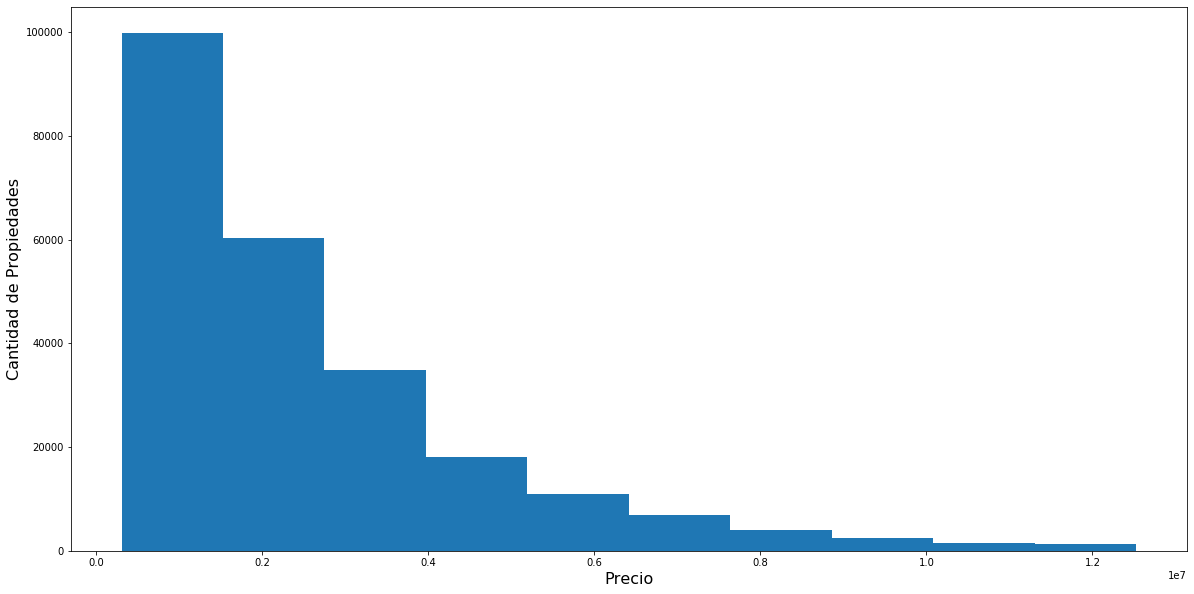

In [13]:
''' ¿Hay más propiedades caras o baratas?'''

plt.figure(figsize = (20, 10))
plt.xlabel("Precio", fontsize = 16);
plt.ylabel("Cantidad de Propiedades", fontsize = 16);
plt.hist(dfok['Precio']);

''' Los mayores precios se encuentran concentrados para la minoría de las propiedades. ''';

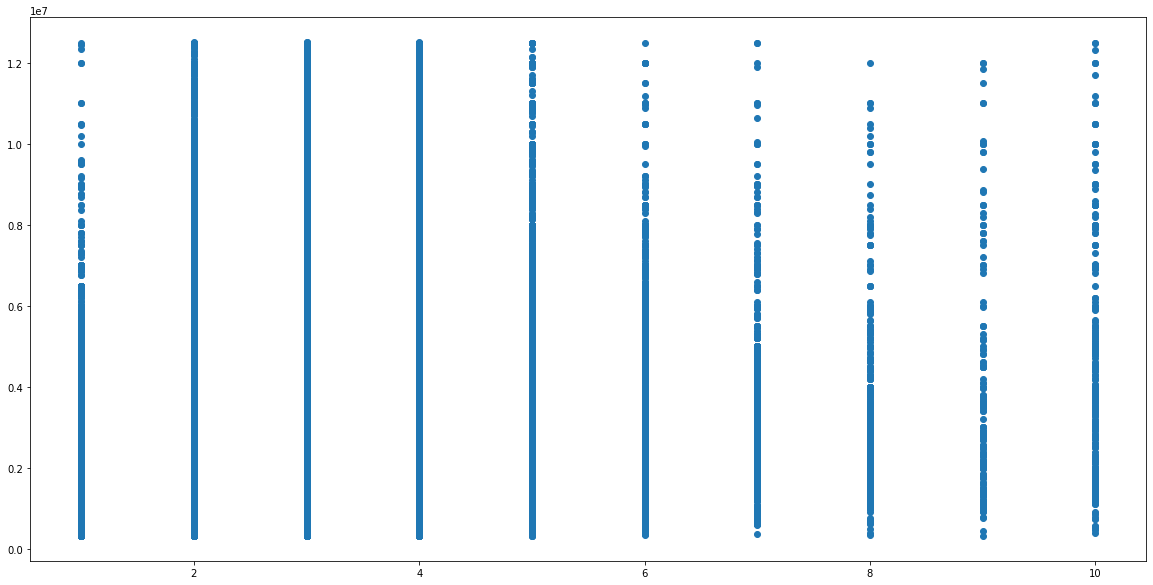

In [14]:
''' ¿El precio es proporcional a la cantidad de habitaciones?
'''

plt.figure(figsize = (20, 10))

# Variables a graficar
x = dfok['CantHabitaciones']
y = dfok['Precio']

# Tipo de gráfico
plt.scatter(x, y)

''' No se aprecia una tendencia clara. ''';

' La cantidad de habitaciones parece tender a aumentar el precio de la propiedad.\n'

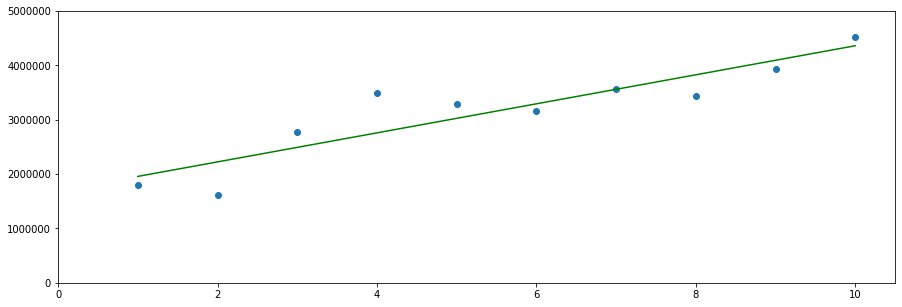

In [15]:
''' ¿El precio promedio es proporcional a la cantidad de habitaciones?
'''
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfok.groupby('CantHabitaciones').mean()['Precio']

plt.figure(figsize = (15, 5))
plt.xlim([0, 10.5])
plt.ylim([0, 5000000])

# Tipo de gráfico
plt.scatter(x, y);
ldt = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, ldt(x), "g")

''' La cantidad de habitaciones parece tender a aumentar el precio de la propiedad.
'''

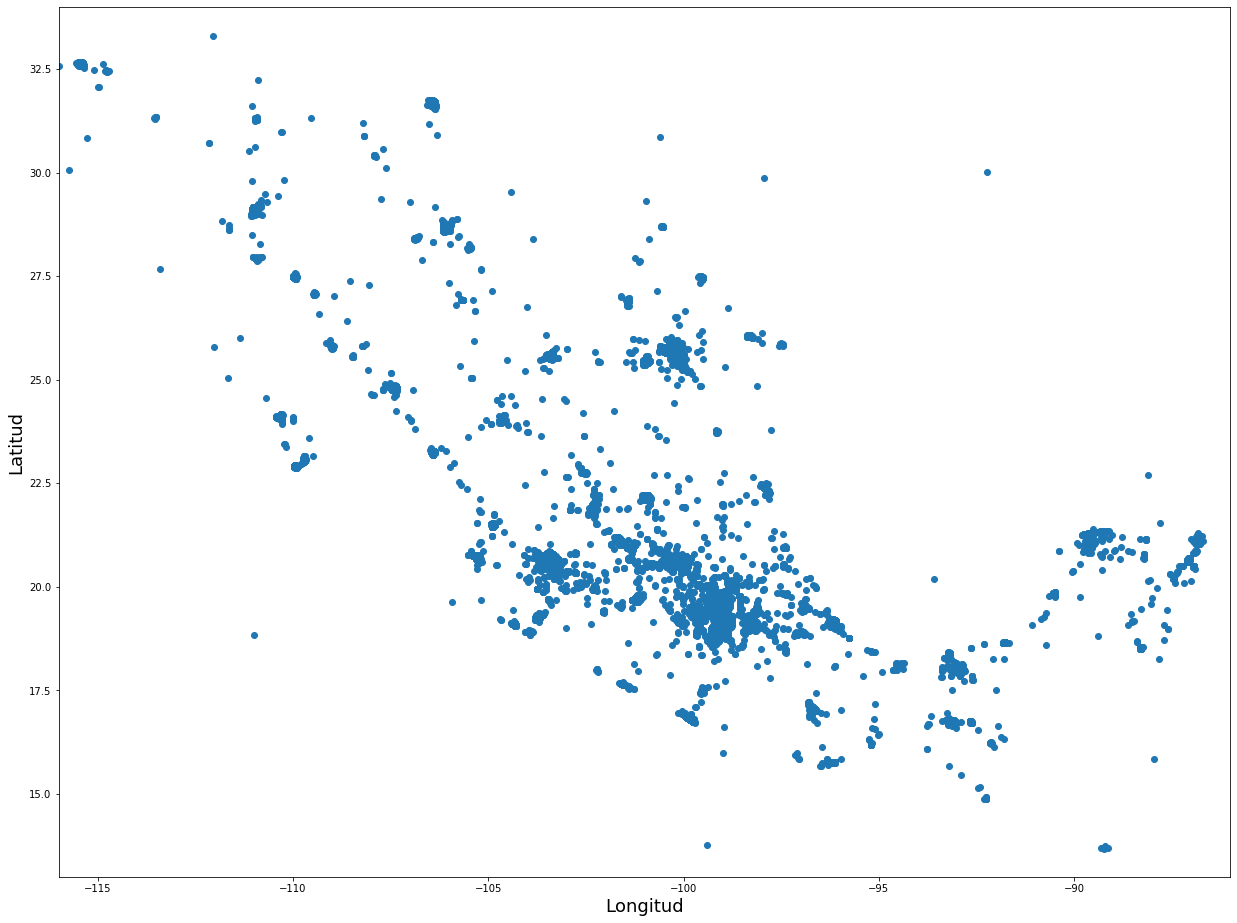

In [16]:
''' México está en el hemisferio norte, por lo que la latitud debe ser positiva
    Además está al oeste del meridiano de Greenwich, por lo que su longitud debe ser negativa'''

# Declarás variables a graficar
x = dfok['Longitud']
y = dfok['Latitud']

plt.figure(figsize = (21, 16))
plt.xlabel("Longitud", fontsize = 18)
plt.ylabel("Latitud", fontsize = 18)

plt.ylim([13, 34])
plt.xlim([-116, -86])

# Tipo de gráficok
plt.scatter(x, y)

In [17]:
dfok2 = pd.DataFrame(dfok)
dfok2['NoTieneLujos']=((dfok['TienePileta']==0) & 
                    (dfok['TieneGimnasio']==0) & 
                    (dfok['TieneUsosMultiples']==0) &
                       (dfok['CantGarages']<=1))

In [18]:
dfok['PrecioMetroCuadrado']=((dfok['Precio']/dfok['MetrosCuadradosTotales']))

'''despues arreglarlo,tendria que sesr precioMetroCuadrado=precioTotal/((C)^(CantidadHabitaciones-1))/MetrosCuadradosTotales
Siendo C una constante(aprox 1.2) que elevaria el precio de la casa un 20% por cada baño >1 que tenga'''

'despues arreglarlo,tendria que sesr precioMetroCuadrado=precioTotal/((C)^(CantidadHabitaciones-1))/MetrosCuadradosTotales\nSiendo C una constante(aprox 1.2) que elevaria el precio de la casa un 20% por cada baño >1 que tenga'

In [19]:
propiedadesSinLujos=dfok2[ (dfok2['NoTieneLujos']) ]

In [20]:
''' El objetivo de esta parte es obtener el precio por metro cuadrado de cada propiedad segun el tipo de vivienda 
y su ciudad correspondiente, asegurandose de que estas no tengan ningun lujo(pileta salon multiple gimnasio etc)
que puedad inferir con el valor a calcular,pues estos atributos adicionales se calcularan aparte mas adelante'''

dfok['TipoPropiedad'].value_counts()

#Considerando esto,se decide calcularlo solo para las casas,deptos,condominios y terrenos,pues los demas 
#representan una minoria despreciable del total de tipo de casas

Casa                             141717
Apartamento                       57341
Casa en condominio                19297
Terreno                            9945
Local Comercial                    3055
Oficina comercial                  1741
Bodega comercial                   1406
Edificio                           1396
Terreno comercial                  1326
Casa uso de suelo                   708
Quinta Vacacional                   395
Duplex                              343
Villa                               340
Inmuebles productivos urbanos       200
Rancho                              170
Local en centro comercial           165
Departamento Compartido             141
Otros                               134
Nave industrial                      76
Terreno industrial                   31
Huerta                               20
Lote                                  5
Garage                                1
Hospedaje                             1
Name: TipoPropiedad, dtype: int64

In [21]:
'''YYYYYYYYYY hasta aca llego...tendria que poner en la tabla el promedio del $/M2 en base al promedio del mismo
segun cada region para asi luego multiplicarlo por el terreno total y obtener un estimativo del precio,luego 
corroborarlo con el precio real y ver que tanto le erro porcentualmente PERO NO PUEDO SUBIR EL PROMEDIO AL DATAFRAME!!'''
'''Se planeaba calcular tipo :(precio propiedad-(tamanio propiedad*precio metro cuadrado*adicionalCantHabitaciones)/precio propiedad) y se
obtendria un porcentaje,las pruebas que hice(pocas obvio,fueron bastante piolas,un error menor al 30%)'''

'Se planeaba calcular tipo :(precio propiedad-(tamanio propiedad*precio metro cuadrado*adicionalCantHabitaciones)/precio propiedad) y se\nobtendria un porcentaje,las pruebas que hice(pocas obvio,fueron bastante piolas,un error menor al 30%)'

In [22]:
propiedadesSinLujos.head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca,NoTieneLujos,PrecioMetroCuadrado
0,254099,depto. tipo a-402,Apartamento,2273000.0,2015-08-23 00:00:00,NaN,80.0,80.0,"depto. interior de 80.15m2, consta de sala com...",2.0,1.0,2.0,23533.0,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,NaN,0.0,0.0,0.0,0.0,0.0,True,28412.500000
3,209067,casa sola en toluca zinacantepec con credito i...,Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,casa en privada con caseta de vigilancia casas...,2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0,True,9701.492537
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones ...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0,True,12105.263158
5,126147,departamento en venta taxqueña,Apartamento,1100000.0,2014-03-18 00:00:00,5.0,75.0,90.0,"amplio departamento, estancia de sala y comedo...",2.0,1.0,1.0,23650.0,Condominio Tlalpan 2B,Coyoacán,Distrito Federal,19.300612,-99.148475,0.0,0.0,0.0,0.0,1.0,True,12222.222222
6,139233,de oportunidad casa en san lorenzo,Casa,1150000.0,2016-02-23 00:00:00,NaN,140.0,160.0,"ubicada en esquina, pertenece san lorenzo agen...",3.0,1.0,2.0,73510.0,NaN,Oaxaca de Juárez,Oaxaca,17.143504,-96.803504,0.0,0.0,0.0,0.0,0.0,True,7187.500000


' La cantidad de baños no varia mucho y ademas esta relacionada con la cantidad de habitaciones\n'

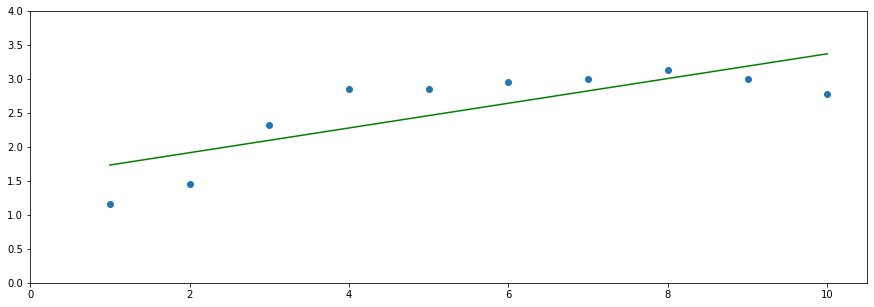

In [23]:
''' Como la cantidad de baños no varia mucho(entre 1 y 4) y se nota una relacion entre la cantidad de estos
y de habitaciones,se considera que su incidencia en el precio esta directamente relacionada con la cantidad 
de baños por lo que solo calcularemos la incidencia de estos en el precio
'''
# Declarás variables a graficar
x = [1,2,3,4,5,6,7,8,9,10]
y = dfok.groupby('CantHabitaciones').mean()['CantBanos']

plt.figure(figsize = (15, 5))
plt.xlim([0, 10.5])
plt.ylim([0, 4])

# Tipo de gráfico
plt.scatter(x, y);
ldt = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, ldt(x), "g")

''' La cantidad de baños no varia mucho y ademas esta relacionada con la cantidad de habitaciones
'''

' La cantidad de habitaciones parece tender a aumentar el precio de la propiedad.\n'

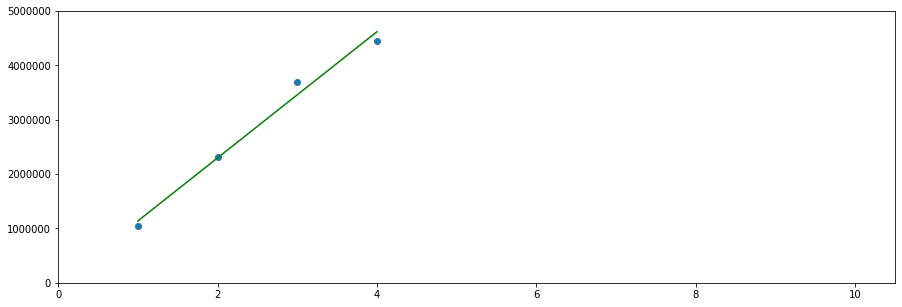

In [24]:
''' ¿El precio promedio es proporcional a la cantidad de habitaciones?
'''
# Declarás variables a graficar
x = [1,2,3,4]
y = dfok.groupby('CantBanos').mean()['Precio']

plt.figure(figsize = (15, 5))
plt.xlim([0, 10.5])
plt.ylim([0, 5000000])

# Tipo de gráfico
plt.scatter(x, y);
ldt = np.poly1d( np.polyfit(x, y, 1) )
plt.plot(x, ldt(x), "g")

''' La cantidad de habitaciones parece tender a aumentar el precio de la propiedad.
'''

In [25]:
MetroPropiedadCiudad=propiedadesSinLujos.groupby(['Ciudad','TipoPropiedad','CantHabitaciones']).agg({'PrecioMetroCuadrado':['median']})
#MetroPropiedadCiudad=propiedadesSinLujos.groupby(['Ciudad','TipoPropiedad','CantHabitaciones'])['PrecioMetroCuadrado'].transform('median')

In [26]:
MetroPropiedadCiudad=MetroPropiedadCiudad.reset_index()
MetroPropiedadCiudad.head()

,Ciudad,TipoPropiedad,CantHabitaciones,PrecioMetroCuadrado
,,,,median
0,Abasolo,Casa,4.0,4533.994334
1,Abasolo,Casa uso de suelo,3.0,9444.444444
2,Acajete,Apartamento,1.0,NaN
3,Acambay,Casa,2.0,2250.000000
4,Acapulco de Juárez,Apartamento,1.0,11680.602007


In [27]:
MetroPropiedadCiudad[(MetroPropiedadCiudad['Ciudad']=='Coyoacán') & (MetroPropiedadCiudad['TipoPropiedad']=='Apartamento')]['PrecioMetroCuadrado']

,median
666,24454.545455
667,19117.647059
668,16875.000000
669,11666.666667
670,10882.352941


In [28]:
#MetroPropiedadCiudad222=MetroPropiedadCiudad.copy()
#merged = propiedadesSinLujos.merge(MetroPropiedadCiudad222, on=['Ciudad', 'TipoPropiedad','CantHabitaciones'], how='left')
'''propiedadesSinLujos.PrecioMetroCuadrado = merged.(PrecioMetroCuadrado, median).where(~merged.(PrecioMetroCuadrado, median).isnull(), propiedadesSinLujos.PrecioMetroCuadrado)'''

#Uso esto para asegurarme que todas tienen la media correcta <3'''

'propiedadesSinLujos.PrecioMetroCuadrado = merged.(PrecioMetroCuadrado, median).where(~merged.(PrecioMetroCuadrado, median).isnull(), propiedadesSinLujos.PrecioMetroCuadrado)'

In [29]:
#propiedadesSinLujos.PrecioMetroCuadrado = merged.PrecioMetroCuadrado.\
#    where(~merged.PrecioMetroCuadrado.isnull(), propiedadesSinLujos.PrecioMetroCuadrado)


#merged[(merged['TipoPropiedad']=='Apartamento') & (merged['CantHabitaciones']==1) ] 
#Uso esto para asegurarme que todas tienen la media correcta <3

In [30]:
#propiedadesSinLujos=merged.copy()

#propiedadesSinLujos.columns = ['PrecioEstimado' if x=='(PrecioMetroCuadrado, median)' else x for x in merged.columns]

#propiedadesSinLujos.head()

In [31]:
'''Incidencia de los lujos(atributos prescindibles de un hogar pero que aumentan su valor) en el precio total
tomando como base del mismo a la media de precio de hogares sin ninguno de estos atributos(los cuales llamaremos
'lujos')'''

"Incidencia de los lujos(atributos prescindibles de un hogar pero que aumentan su valor) en el precio total\ntomando como base del mismo a la media de precio de hogares sin ninguno de estos atributos(los cuales llamaremos\n'lujos')"

In [32]:
Simples=propiedadesSinLujos #la renombro para que no me figure 'sin lujos' en el grafico sin explicar que es
Simples['Precio'].mean()  

1535417.658168542

In [33]:
ConGimnasio=dfok[ (dfok['TieneGimnasio'] >= 1) ]
ConGimnasio['Precio'].median()

3233000.0

In [34]:
ConPileta=dfok[ (dfok['TienePileta'] >= 1) ]
ConPileta['Precio'].median()

2750000.0

In [35]:
ConSalonMultiple=dfok[ (dfok['TieneUsosMultiples'] == 1)  ]
ConSalonMultiple['Precio'].mean()
#len(ConSalonMultiple)

3827091.0210255636

In [36]:
ConMasDeUnGarage=dfok[ (dfok['CantGarages'] > 1) ]
ConMasDeUnGarage['Precio'].median()
#Esto se considera como un lujo porque la gran mayoria de las familias puede vivir con un unico auto

2400000.0

<BarContainer object of 5 artists>

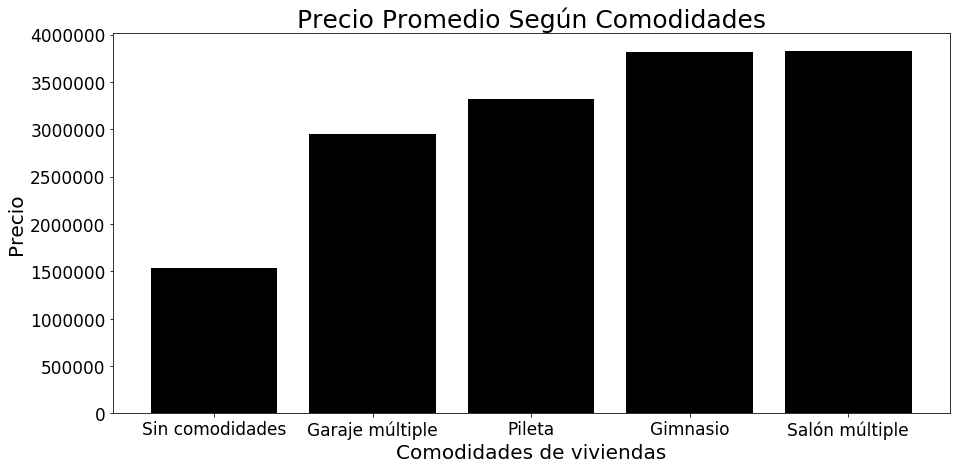

In [37]:
AtributosPrescindibles = pd.DataFrame({'Atributos de viviendas':['Sin comodidades', 'Garaje múltiple' , 'Pileta','Gimnasio','Salón múltiple'], \
                       'Precio':[Simples['Precio'].mean() , ConMasDeUnGarage['Precio'].mean() , \
                        ConPileta['Precio'].mean() , ConGimnasio['Precio'].mean(), \
                              ConSalonMultiple['Precio'].mean()]})      

x = AtributosPrescindibles['Atributos de viviendas']
y = AtributosPrescindibles['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Comodidades de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Promedio Según Comodidades")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

#Línea de regresión
    #ldt = np.poly1d( np.polyfit(x, y, 1) )
    #plt.plot(x, ldt(x), "g")

In [38]:
'''Si bien a partir de estos datos es facil asumir que la prescencia de un gimnasio,una pileta o un salon 
multiple aumentan en gran medida el valor de una casas,puede no necesariamente ser asi,como se vera a continuacion'''

'Si bien a partir de estos datos es facil asumir que la prescencia de un gimnasio,una pileta o un salon \nmultiple aumentan en gran medida el valor de una casas,puede no necesariamente ser asi,como se vera a continuacion'

In [39]:
SoloConGimnasio=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]
SoloConGimnasio['Precio'].mean()

1772166.8187772925

In [40]:
SoloConPileta=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]
SoloConPileta['Precio'].mean()

1606344.5185185184

In [41]:
SoloConMasDeUnGarage=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] > 1) & 
                        (dfok['TieneUsosMultiples'] == 0) ]
SoloConMasDeUnGarage['Precio'].mean()

2816681.965884568

In [42]:
SoloConSalonMultiple=dfok[ (dfok['TienePileta'] == 0) & 
                        (dfok['TieneGimnasio'] == 0) & 
                        (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]
SoloConSalonMultiple['Precio'].mean()
#len(SoloConSalonMultiple)

1723730.3060498221

<BarContainer object of 5 artists>

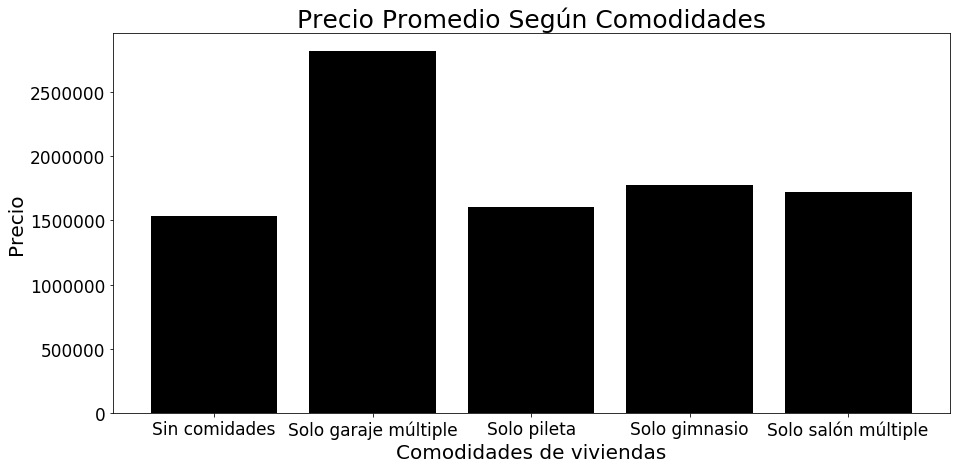

In [43]:
AtributosPrescindibles = pd.DataFrame({'Atributos de viviendas':['Sin comidades', 'Solo garaje múltiple' , 'Solo pileta','Solo gimnasio','Solo salón múltiple'], \
                       'Precio':[Simples['Precio'].mean() , SoloConMasDeUnGarage['Precio'].mean() , \
                        SoloConPileta['Precio'].mean() , SoloConGimnasio['Precio'].mean(), \
                              SoloConSalonMultiple['Precio'].mean()]})
AtributosPrescindibles.head()       

x = AtributosPrescindibles['Atributos de viviendas']
y = AtributosPrescindibles['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Comodidades de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Promedio Según Comodidades")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black')

In [44]:
'''De aqui se puede ver mejor cómo la presencia de un unico atributo de estos no parece aumentar el precio
de una vivienda en mucho mas del %30, a exepcion de la cantidad de garages. 
Por lo que el aumento que incialmente parecia ser mayor se debe a que si en una casa se encuentra uno de estos
atributos,hay una gran probabilidad de tenga otros que aumenten su valor aun mas'''

'De aqui se puede ver mejor cómo la presencia de un unico atributo de estos no parece aumentar el precio\nde una vivienda en mucho mas del %30, a exepcion de la cantidad de garages. \nPor lo que el aumento que incialmente parecia ser mayor se debe a que si en una casa se encuentra uno de estos\natributos,hay una gran probabilidad de tenga otros que aumenten su valor aun mas'

In [45]:
cantidadSimples=len(Simples)
cantidadSimples

80253

In [46]:
cantidadConGimnasio=len(ConGimnasio)
cantidadSoloConGimnasio=len(SoloConGimnasio)
print(cantidadConGimnasio)
print(cantidadSoloConGimnasio)

14994
916


In [47]:
cantidadConPileta=(len(ConPileta))
cantidadSoloConPileta=(len(SoloConPileta))
print(cantidadConPileta)
print(cantidadSoloConPileta)


20972
2808


In [48]:
cantidadConSalonMultiple=(len(ConSalonMultiple))
cantidadSoloConSalonMultiple=(len(SoloConSalonMultiple))
print(cantidadConSalonMultiple)
print(cantidadSoloConSalonMultiple)

13222
843


In [49]:
cantidadConMasDeUnGarage=(len(ConMasDeUnGarage))
cantidadSoloConMasDeUnGarage=(len(SoloConMasDeUnGarage))
print(cantidadConMasDeUnGarage)
print(cantidadSoloConMasDeUnGarage)

115845
94532


In [50]:
'''Aca se puede verificar puesto que, 9 de 10 casas que tengan un gimnasio o una pileta,tambien tendran otro
atributo similar que eleve aun mas el precio'''

'Aca se puede verificar puesto que, 9 de 10 casas que tengan un gimnasio o una pileta,tambien tendran otro\natributo similar que eleve aun mas el precio'

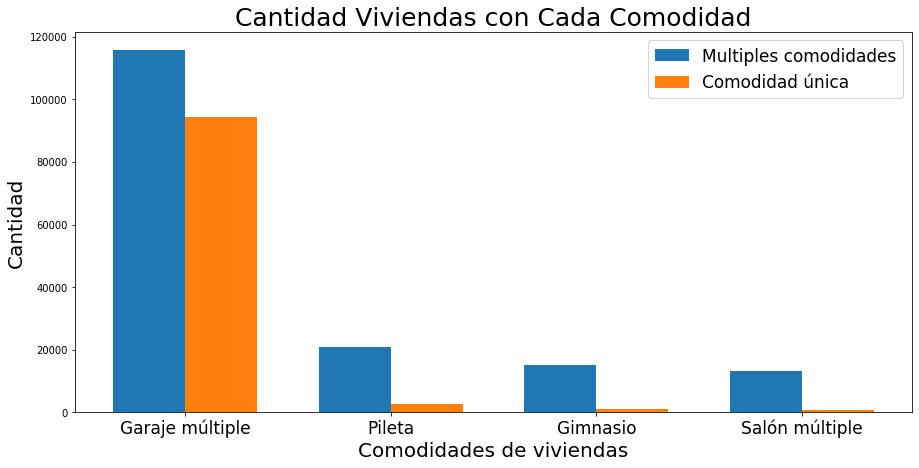

In [51]:
labels = ['Garaje múltiple', 'Pileta','Gimnasio', 'Salón múltiple']
MultiplesAtributos = [cantidadConMasDeUnGarage, cantidadConPileta ,cantidadConGimnasio,cantidadConSalonMultiple]
UnicoAtributo = [cantidadSoloConMasDeUnGarage, cantidadSoloConPileta ,cantidadSoloConGimnasio,cantidadSoloConSalonMultiple]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width/2, MultiplesAtributos, width, label='Multiples comodidades')
rects2 = ax.bar(x + width/2, UnicoAtributo, width, label='Comodidad única')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Cantidad Viviendas con Cada Comodidad', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)


#autolabel(rects1)
#autolabel(rects2)

plt.show()

In [52]:
PiletaSinGarages=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['CantGarages'] <= 1)  ]

PiletaConGarages=dfok[ (dfok['TienePileta'] == 1) & 
                        (dfok['CantGarages'] > 1)  ]

In [53]:
GimnasioSinGarages=dfok[ (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] <= 1) ]

GimnasioConGarages=dfok[ (dfok['TieneGimnasio'] == 1) & 
                        (dfok['CantGarages'] > 1) ]

In [54]:
SalónMultipleSinGarages=dfok[ (dfok['CantGarages'] <= 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]

SalónMultipleConGarages=dfok[ (dfok['CantGarages'] > 1) & 
                        (dfok['TieneUsosMultiples'] == 1) ]

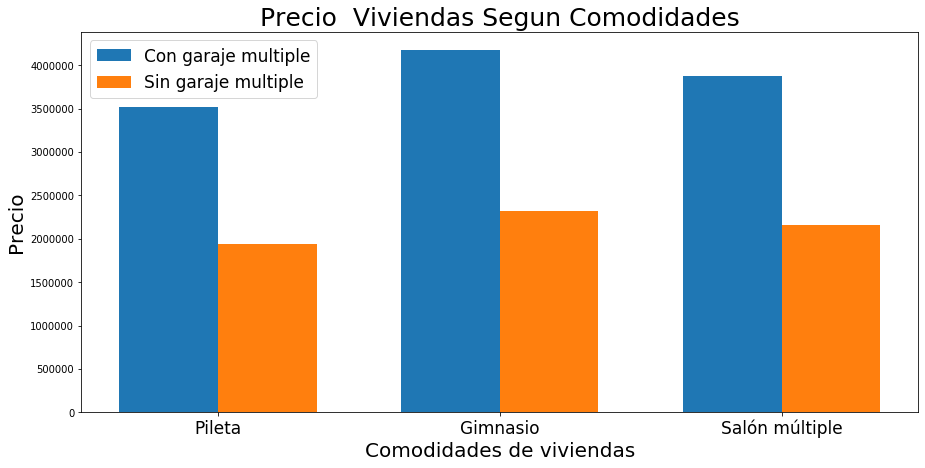

In [55]:
labels = ['Pileta','Gimnasio','Salón múltiple']
ComodidadConGarages = [PiletaConGarages['Precio'].mean(),GimnasioConGarages['Precio'].mean(),SalónMultipleConGarages['Precio'].mean()]
ComodidadSinGarages = [PiletaSinGarages['Precio'].mean(),GimnasioSinGarages['Precio'].mean(),SalónMultipleSinGarages['Precio'].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width/2, ComodidadConGarages, width, label='Con garaje multiple')
rects2 = ax.bar(x + width/2, ComodidadSinGarages, width, label='Sin garaje multiple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Precio', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Precio  Viviendas Segun Comodidades', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)


plt.show()

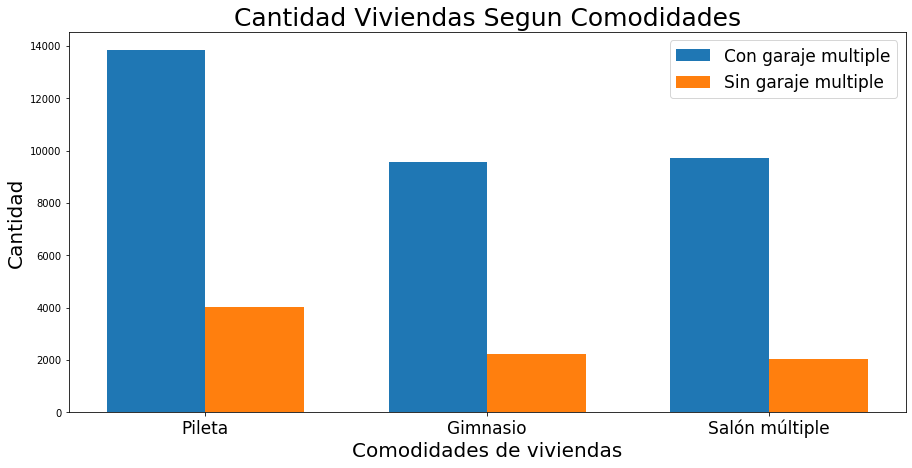

In [56]:
labels = ['Pileta','Gimnasio','Salón múltiple']
ComodidadConGarages = [len(PiletaConGarages),len(GimnasioConGarages),len(SalónMultipleConGarages)]
ComodidadSinGarages = [len(PiletaSinGarages),len(GimnasioSinGarages),len(SalónMultipleSinGarages)]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax =plt.subplots(figsize=(15,7)) 
rects1 = ax.bar(x - width/2, ComodidadConGarages, width, label='Con garaje multiple')
rects2 = ax.bar(x + width/2, ComodidadSinGarages, width, label='Sin garaje multiple')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Cantidad', fontsize=20)
ax.set_xlabel('Comodidades de viviendas', fontsize=20)
ax.set_title('Cantidad Viviendas Segun Comodidades', fontsize=25)
ax.set_xticks(x)
ax.set_xticklabels(labels, fontsize=17)
ax.legend(fontsize=17)


plt.show()

In [57]:
dfok['SoloUnaComodidad']=(((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 1))
                         |((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] > 1) &  (dfok['TieneUsosMultiples'] == 0))
                         |((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 1) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 0))
                         |((dfok['TienePileta'] == 1) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 0)))




In [58]:
'''Verifico lo anterior mostrando que es igualmente aplicable a cualquier region'''

unicaComodidad=dfok[ 
    ((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 1)) | 
    ((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] > 1) &  (dfok['TieneUsosMultiples'] == 0))  |
    ((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 1) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 0)) |
    ((dfok['TienePileta'] == 1) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 0)) 


]

len(unicaComodidad)

99099

In [59]:
unicaComodidadPorRegion=unicaComodidad
unicaComodidadPorRegion=unicaComodidad.groupby(['Ciudad']).agg({'Precio':['median']})
unicaComodidadPorRegion.head()

,Precio
,median
Ciudad,
Abasolo,2500000.0
Acajete,2525000.0
Acambay,1200000.0
Acapulco de Juárez,1500000.0
Acatzingo,5100000.0


In [60]:
ningunaComodidad=dfok[((dfok['TienePileta'] == 0) & (dfok['TieneGimnasio'] == 0) & (dfok['CantGarages'] <= 1) &  (dfok['TieneUsosMultiples'] == 0)) ]
len(ningunaComodidad)

80253

In [61]:
ningunaComodidadPorRegion=ningunaComodidad
ningunaComodidadPorRegion=ningunaComodidad.groupby(['Ciudad']).agg({'Precio':['median']})
ningunaComodidadPorRegion.head()

,Precio
,median
Ciudad,
Abalá,315000.0
Abasolo,1140250.0
Acajete,2368686.0
Acambay,450000.0
Acapulco de Juárez,980000.0


In [62]:
'''Analisis de casas segun su cercania a escuelas y shoppings'''

'Analisis de casas segun su cercania a escuelas y shoppings'

In [63]:
dfok[ (dfok['TieneEscuelasCerca'] == 1) ]['Precio'].median()

1870000.0

In [64]:
dfok[ (dfok['TieneEscuelasCerca'] == 0) ]['Precio'].median()

1850000.0

In [65]:
dfok[ (dfok['TieneShoppingsCerca'] == 1) ]['Precio'].median()

1940500.0

In [66]:
dfok[ (dfok['TieneShoppingsCerca'] == 0) ]['Precio'].median()

1800000.0

In [67]:
dfok['Precio'].median()

1850000.0

<BarContainer object of 3 artists>

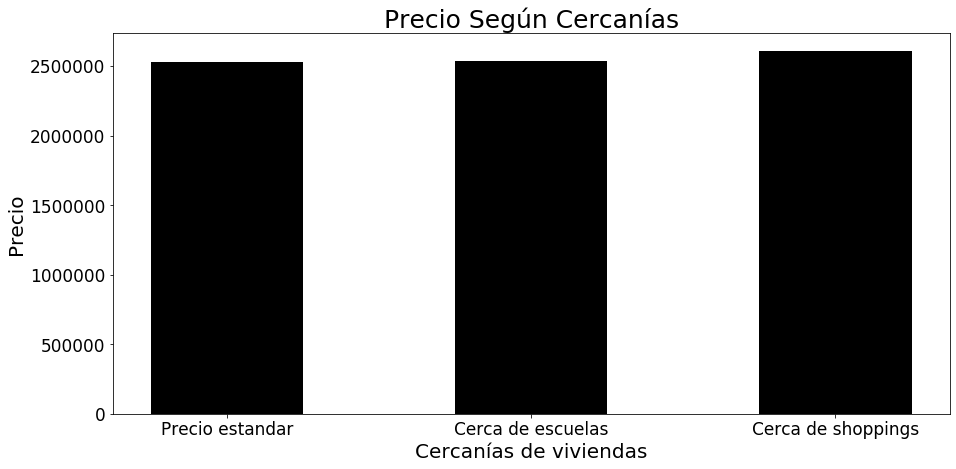

In [68]:
CercaniadeCasas = pd.DataFrame({'Cercania de casas':['Precio estandar', 'Cerca de escuelas' , 'Cerca de shoppings'], \
                       'Precio':[dfok['Precio'].mean(), dfok[ (dfok['TieneEscuelasCerca'] == 1) ]['Precio'].mean() , \
                        dfok[ (dfok['TieneShoppingsCerca'] == 1) ]['Precio'].mean()]})      

x = CercaniadeCasas['Cercania de casas']
y = CercaniadeCasas['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Cercanías de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Precio Según Cercanías")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black',width=0.5)

In [69]:
'''Se puede ver como,el hecho de que esté o no cerca de una escuela no afecta mucho el precio'''

'Se puede ver como,el hecho de que esté o no cerca de una escuela no afecta mucho el precio'

In [70]:
dfok[ (dfok['TieneEscuelasCerca'] == 1) ]['CantHabitaciones'].mean()

2.920578440312413

In [71]:
dfok[ (dfok['TieneEscuelasCerca'] == 0) ]['CantHabitaciones'].mean()

2.8865368622306815

In [72]:
dfok['CantHabitaciones'].mean()

2.902325666922571

In [73]:
'''Quizá el hecho de que una casa estuviera cerca de escuelas apuntara a familias con numerosos 
hijos,pero la cantidad de habitaciones se mantiene constante estando cerca de escuelas o no...'''

'Quizá el hecho de que una casa estuviera cerca de escuelas apuntara a familias con numerosos \nhijos,pero la cantidad de habitaciones se mantiene constante estando cerca de escuelas o no...'

In [74]:
'''Sin embargo,SI se puede encontrar una relacion entre estar cerca de una escuela,probablemente porque la 
familia que pretenda comprar la casa tenga hijos,y que la misma esté equipaca para que estos tengan actividades
recreativas a realizar,como que la casa tenga pileta,gimnasio,salon multiple(potencial salon de juegos) y,
mayoritariamente,que este cerca de un shopping'''

'Sin embargo,SI se puede encontrar una relacion entre estar cerca de una escuela,probablemente porque la \nfamilia que pretenda comprar la casa tenga hijos,y que la misma esté equipaca para que estos tengan actividades\nrecreativas a realizar,como que la casa tenga pileta,gimnasio,salon multiple(potencial salon de juegos) y,\nmayoritariamente,que este cerca de un shopping'

In [75]:
'''cantidad de casas cerca de escuelas'''

len(dfok[ (dfok['TieneEscuelasCerca'] == 1) ])

106594

In [76]:
'''cantidad de casas cerca de shoppings'''

len(dfok[ (dfok['TieneShoppingsCerca'] == 1) ])

95168

In [77]:
'''cantidad de casas cerca de ambos'''

len(dfok[ (dfok['TieneEscuelasCerca'] == 1) &  (dfok['TieneShoppingsCerca'] == 1)])

87915

<BarContainer object of 3 artists>

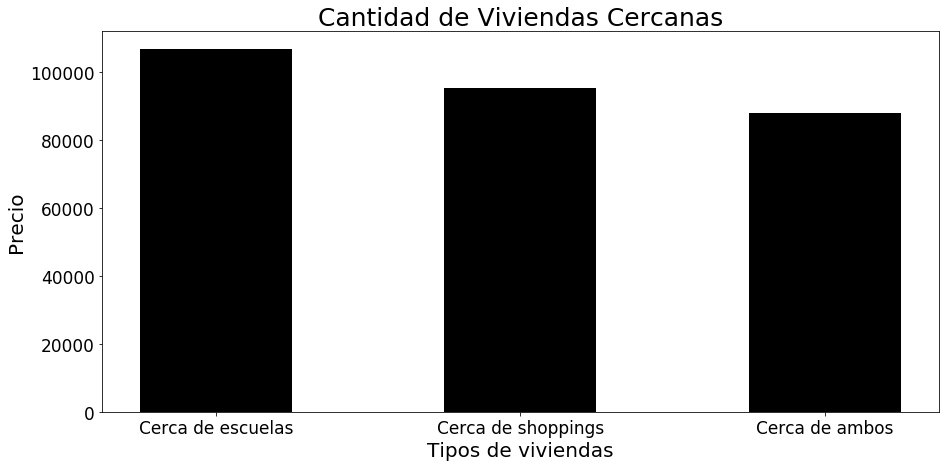

In [78]:
CercaniadeCasas = pd.DataFrame({'Cercania de viviendas':['Cerca de escuelas' , 'Cerca de shoppings', 'Cerca de ambos'], \
                       'Precio':[len(dfok[ (dfok['TieneEscuelasCerca'] == 1) ]),len(dfok[ (dfok['TieneShoppingsCerca'] == 1) ]) , \
                       len(dfok[ (dfok['TieneEscuelasCerca'] == 1) &  (dfok['TieneShoppingsCerca'] == 1)])]})      

x = CercaniadeCasas['Cercania de viviendas']
y = CercaniadeCasas['Precio']
grafico = plt.figure(figsize = (15, 7));

# Tamaño de los títulos de los ejes
plt.xlabel("Tipos de viviendas", fontsize = 20);
plt.ylabel("Precio", fontsize = 20);

# Título
plt.rcParams.update( { 'axes.titlesize':'25' } )
plt.title("Cantidad de Viviendas Cercanas")

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
plt.xticks(rotation = 0)

# Límites para cada coordenada
#plt.ylim([13, 34]);
#plt.xlim([-116, -86]);

# Tipo de gráfico
plt.bar(x, y, color = 'black',width=0.5)

In [79]:
'''Efectivamente,casi 9 de casa 10 casas que esten cerca de una escuela,tambien lo estan de un shopping'''
'''Aunque esto tambien se pueda deber a que los lugares donde construir los shoppings se elijan en base a que
estén cerca de escuelas para tener una clientela asegurada,por lo que,ovbiamente si una vivienda esta cerca de una
escuela,muy probablemente lo este tambien de un shopping'''

'Aunque esto tambien se pueda deber a que los lugares donde construir los shoppings se elijan en base a que\nestén cerca de escuelas para tener una clientela asegurada,por lo que,ovbiamente si una vivienda esta cerca de una\nescuela,muy probablemente lo este tambien de un shopping'

In [80]:
'''Porcentaje de casas que NO estan cerca de una escuelas y tienen pileta,gimnasio o salon multiple,
y porcentaje de casas que SI,y tambuen tengan eso'''

'Porcentaje de casas que NO estan cerca de una escuelas y tienen pileta,gimnasio o salon multiple,\ny porcentaje de casas que SI,y tambuen tengan eso'

In [81]:
casasConEscuela=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) ])
print(casasConEscuela)

conEscuelaSinGimnasio=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneGimnasio'] == 0) ])
print(conEscuelaSinGimnasio)

ConEscuelaConGimnasio=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneGimnasio'] == 1) ])
print(ConEscuelaConGimnasio)
'''No hay evidencia suficiente para respaldar una correlacion'''

106594
94029
12565


'No hay evidencia suficiente para respaldar una correlacion'

In [82]:
print(casasConEscuela)

conEscuelaSinPileta=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TienePileta'] == 0) ])
print(conEscuelaSinPileta)

conEscuelaConPileta=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TienePileta'] == 1) ])
print(conEscuelaConPileta)
'''Tampoco hay evidencia suficiente para respaldar una correlacion'''

106594
91391
15203


'Tampoco hay evidencia suficiente para respaldar una correlacion'

In [83]:
print(casasConEscuela)

conEscuelaSinZoom=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneUsosMultiples'] == 0) ])
print(conEscuelaSinZoom)

conEscuelaConZoom=len(dfok[ (dfok['TieneEscuelasCerca'] == 1) & (dfok['TieneUsosMultiples'] == 1) ])
print(conEscuelaConZoom)
'''Efectivamente,la mayoria de las casas que tienen un zoom,se encuentran cerca de escuelas'''

106594
95381
11213


'Efectivamente,la mayoria de las casas que tienen un zoom,se encuentran cerca de escuelas'

In [84]:
'''Bueno...no hay nada que relacionar...'''

'Bueno...no hay nada que relacionar...'

In [85]:
dfok.head()

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca,NoTieneLujos,PrecioMetroCuadrado,SoloUnaComodidad
0,254099,depto. tipo a-402,Apartamento,2273000.0,2015-08-23 00:00:00,NaN,80.0,80.0,"depto. interior de 80.15m2, consta de sala com...",2.0,1.0,2.0,23533.0,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,NaN,0.0,0.0,0.0,0.0,0.0,True,28412.500000,False
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del h...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0,False,20000.000000,True
2,247984,casa en venta urbi 3 recamaras tonala,Casa,1200000.0,2015-10-17 00:00:00,5.0,144.0,166.0,descripcion \nla mejor ubicacion residencial e...,3.0,2.0,2.0,48551.0,Urbi Tonala,Tonalá,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0,False,7228.915663,True
3,209067,casa sola en toluca zinacantepec con credito i...,Casa,650000.0,2012-03-09 00:00:00,1.0,63.0,67.0,casa en privada con caseta de vigilancia casas...,2.0,1.0,1.0,53666.0,IGNACIO MANUEL ALTAMIRANO 128,Zinacantepec,Edo. de México,19.301890,-99.688015,0.0,0.0,0.0,1.0,1.0,True,9701.492537,False
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones ...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0,True,12105.263158,False


In [86]:
dfok[dfok['Antiguedad']==10].head(3)

,ID,Titulo,TipoPropiedad,Precio,Fecha,Antiguedad,MetrosCuadradosCubiertos,MetrosCuadradosTotales,Descripcion,CantHabitaciones,CantGarages,CantBanos,IDZona,Direccion,Ciudad,Provincia,Latitud,Longitud,TieneGimnasio,TieneUsosMultiples,TienePileta,TieneEscuelasCerca,TieneShoppingsCerca,NoTieneLujos,PrecioMetroCuadrado,SoloUnaComodidad
1,53461,condominio horizontal en venta,Casa en condominio,3600000.0,2013-06-28 00:00:00,10.0,268.0,180.0,"<p>entre sonora y guerrero, atr&aacute;s del h...",3.0,2.0,2.0,24514.0,AV. MEXICO,La Magdalena Contreras,Distrito Federal,19.310205,-99.227655,0.0,0.0,0.0,1.0,1.0,False,20000.000000,True
4,185997,paseos del sol,Apartamento,1150000.0,2016-06-07 00:00:00,10.0,95.0,95.0,bonito departamento en excelentes condiciones ...,2.0,1.0,1.0,47835.0,PASEOS DEL SOL,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0,True,12105.263158,False
41,212847,departamento en arcos de zapopan,Apartamento,525000.0,2016-05-22 00:00:00,10.0,84.0,84.0,bonito departamento muy bien ubicado en planta...,2.0,1.0,1.0,311049.0,ARCO PERTINAX,Zapopan,Jalisco,NaN,NaN,0.0,0.0,0.0,0.0,0.0,True,6250.000000,False


In [87]:
PiletaSegunAños=dfok.groupby(['Antiguedad']).agg({"TienePileta" :['mean']})

In [88]:
cantidadTotalDeXAño=(dfok[dfok['Antiguedad']==0])
cantidadTotalDeXAñoConPileta=(dfok[(dfok['Antiguedad']==0) & (dfok['TienePileta'])])
len(cantidadTotalDeXAñoConPileta)/len(cantidadTotalDeXAño)
#Cantidad de casas con antiguedad 0 con pileta/ Cantidad de casas con antiguedad 0
#Osea la media,para verificar que los valores del groupby fueron generados correctamente

0.13277043806496475

In [89]:
cantidadTotalDeXAño=(dfok[dfok['Antiguedad']==1])
cantidadTotalDeXAñoConPileta=(dfok[(dfok['Antiguedad']==1) & (dfok['TienePileta'])])
len(cantidadTotalDeXAñoConPileta)/len(cantidadTotalDeXAño)
#Cantidad de casas con antiguedad 1 con pileta/ Cantidad de casas con antiguedad 1
#Osea la media,para verificar que los valores del groupby fueron generados correctamente

0.1597992390512426

In [90]:
cantidadTotalDeXAño=(dfok[dfok['Antiguedad']==8])
cantidadTotalDeXAñoConPileta=(dfok[(dfok['Antiguedad']==8) & (dfok['TienePileta'])])
len(cantidadTotalDeXAñoConPileta)/len(cantidadTotalDeXAño)
#Cantidad de casas con antiguedad 8 con pileta/ Cantidad de casas con antiguedad 8
#Osea la media,para verificar que los valores del groupby fueron generados correctamente

0.07196029776674938

In [91]:
#Efectivamente,lo fueron

In [92]:
PiletaSegunAños.head(10)

,TienePileta
,mean
Antiguedad,
0.0,0.132770
1.0,0.159799
2.0,0.178691
3.0,0.180377
4.0,0.163142
5.0,0.111308
6.0,0.094352
7.0,0.083578


In [93]:
PiletaSegunAños=PiletaSegunAños.reset_index()

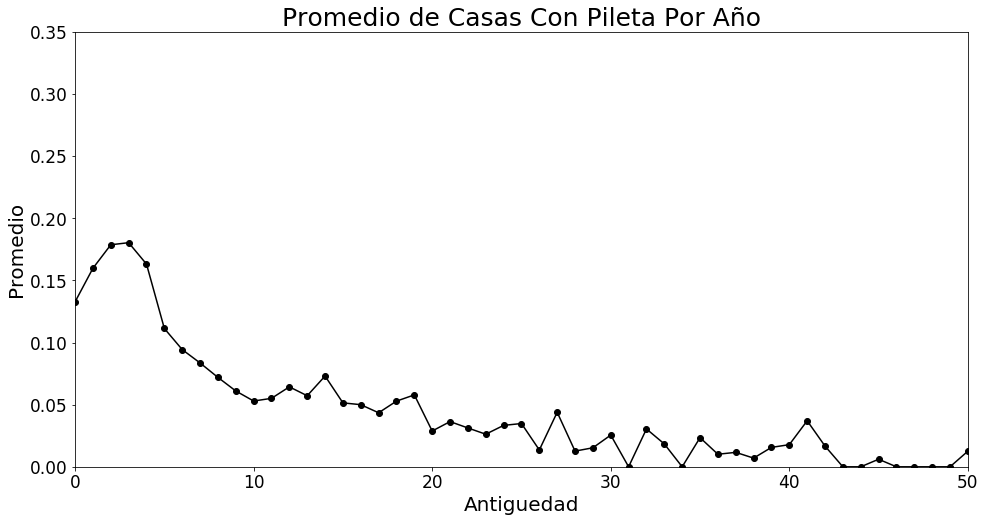

In [96]:
PromedioPiletas= PiletaSegunAños.TienePileta
Antiguedad=PiletaSegunAños.index

# Variables a graficar
y = Antiguedad
x = PromedioPiletas

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Promedio", fontsize = 20);
plt.xlabel("Antiguedad", fontsize = 20);

# Título
plt.title("Promedio de Casas Con Pileta Por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 0.35]);
plt.xlim([0, 50]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, color = 'black',  marker = 'o')

In [98]:
GimnasioSegunAños=dfok.groupby(['Antiguedad']).agg({"TieneGimnasio" :['mean']})

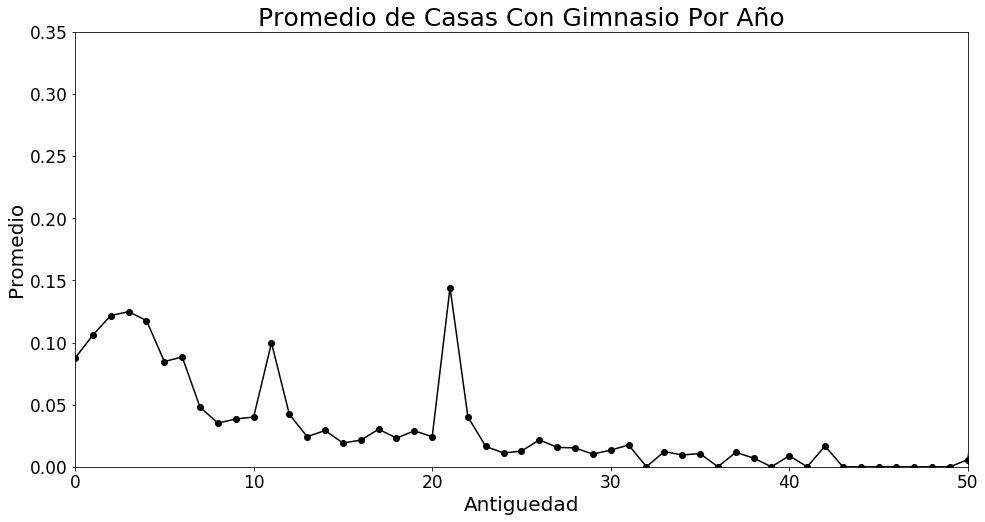

In [105]:
PromedioGimnasios= GimnasioSegunAños.TieneGimnasio
Antiguedad=GimnasioSegunAños.index

# Variables a graficar
y = Antiguedad
x = PromedioGimnasios

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Promedio", fontsize = 20);
plt.xlabel("Antiguedad", fontsize = 20);

# Título
plt.title("Promedio de Casas Con Gimnasio Por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 0.35]);
plt.xlim([0, 50]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, color = 'black',  marker = 'o')

In [100]:
UsosMultiplesSegunAños=dfok.groupby(['Antiguedad']).agg({"TieneUsosMultiples" :['mean']})

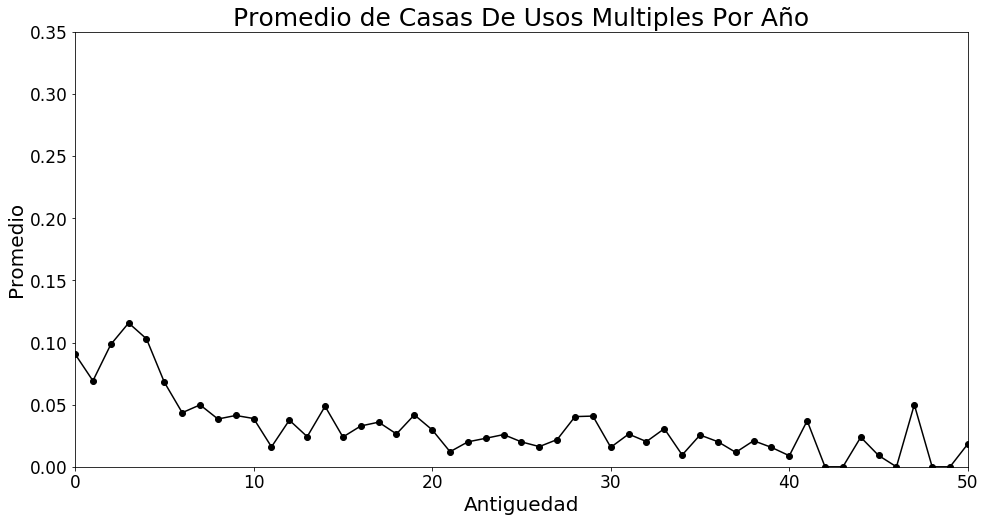

In [103]:
PromedioUsosMultiples= UsosMultiplesSegunAños.TieneUsosMultiples
Antiguedad=UsosMultiplesSegunAños.index

# Variables a graficar
y = Antiguedad
x = PromedioUsosMultiples

# Tamaño del gráfico
fig, ax = plt.subplots(figsize = (16, 8))

# Tamaño de los títulos de los ejes
plt.ylabel("Promedio", fontsize = 20);
plt.xlabel("Antiguedad", fontsize = 20);

# Título
plt.title("Promedio de Casas De Usos Multiples Por Año", fontsize = 25)

# Tamaño de las letras de los ejes
plt.tick_params(axis='both', which='major', labelsize = 17)
plt.tick_params(axis='both', which='minor', labelsize = 17)

# Rotar ejes
#plt.xticks(rotation = 90)

# Límites para cada coordenada
plt.ylim([0, 0.35]);
plt.xlim([0, 50]);

#plt.xlim([-116, -86]);


# Tipo de gráfico
plt.plot(x, color = 'black',  marker = 'o')